In [13]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("ggplot2")
install.packages("cowplot")
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpOjYNme/downloaded_packages


In [3]:
subjective <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/fieldwork/subjective_table.csv")

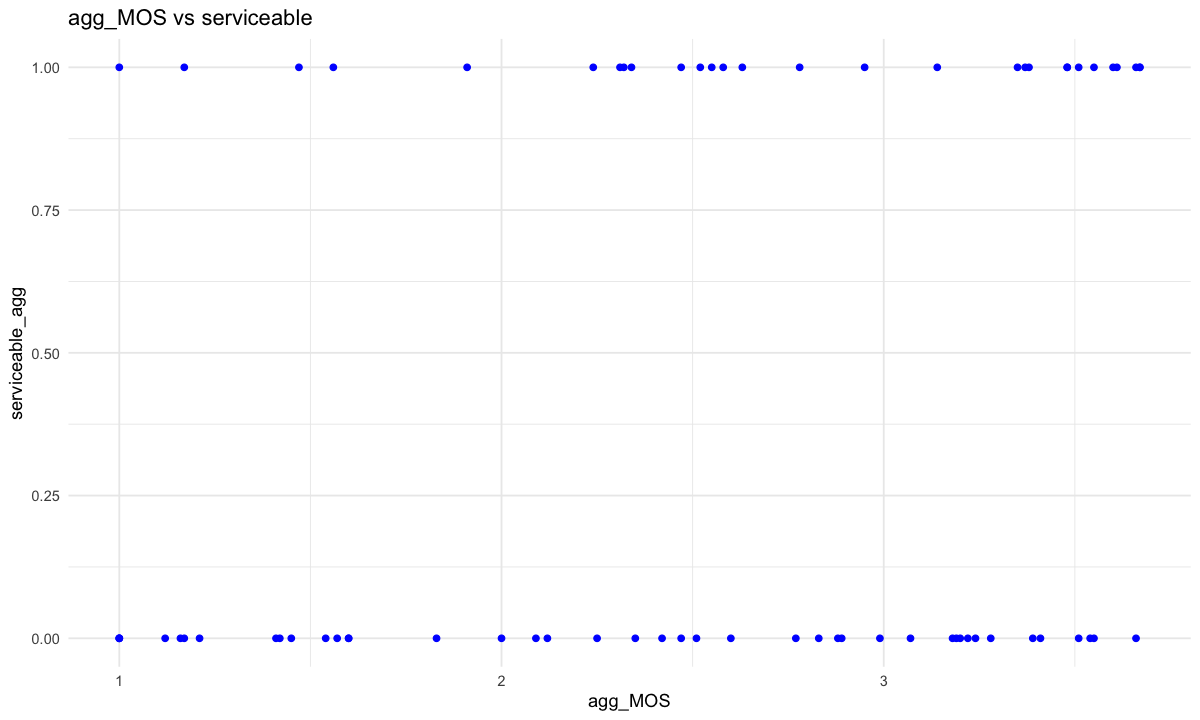

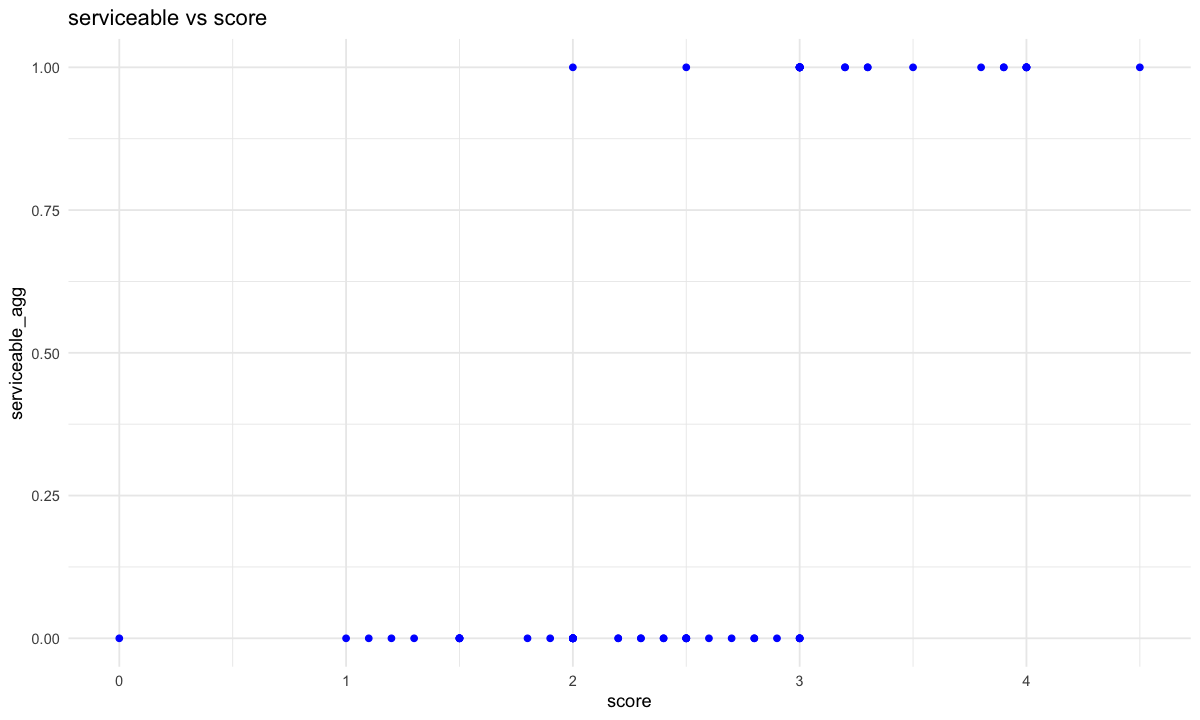

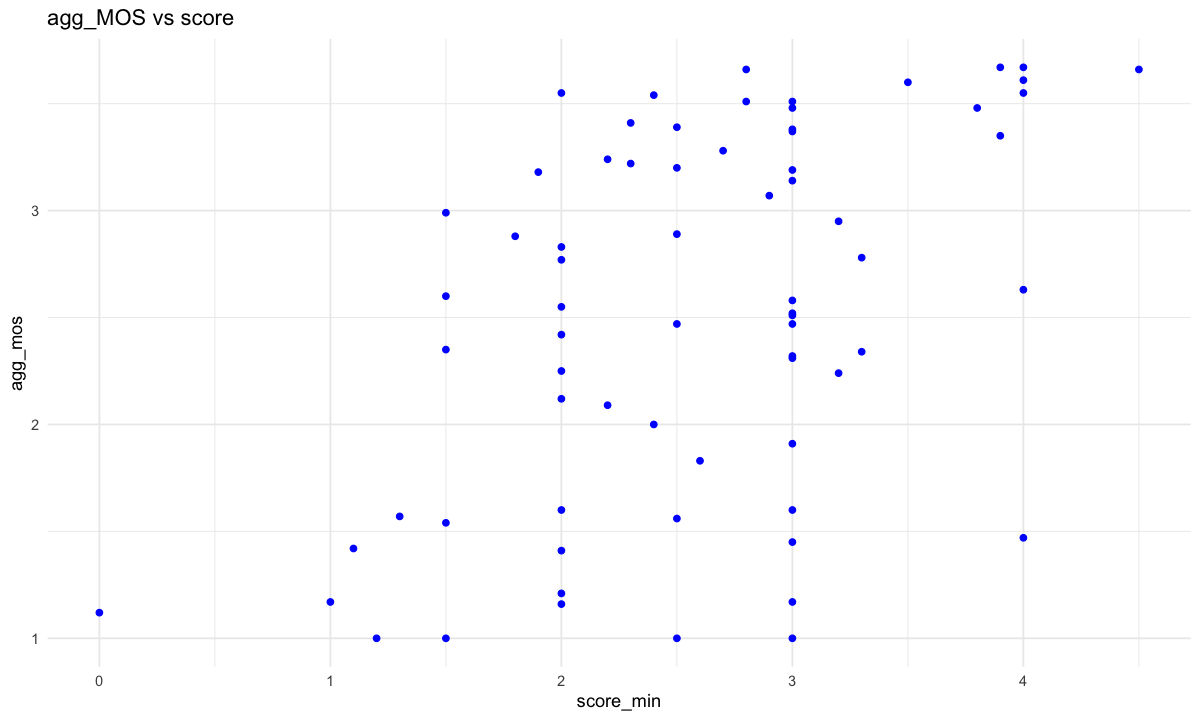

In [19]:

library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 6)

# Create a scatter plot using ggplot2
ggplot(subjective, aes(x = agg_mos, y = serviceable_agg)) +
  geom_point(color = "blue") +
  labs(title = "agg_MOS vs serviceable", x = "agg_MOS", y = "serviceable_agg") +
  theme_minimal()
ggplot(subjective, aes(x = score_min, y = serviceable_agg)) +
  geom_point(color = "blue") +
  labs(title = "serviceable vs score", x = "score", y = "serviceable_agg") +
  theme_minimal()
ggplot(subjective, aes(x = score_min, y = agg_mos)) +
  geom_point(color = "blue") +
  labs(title = "agg_MOS vs score", x = "score_min", y = "agg_mos") +
  theme_minimal()

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 31 17
         1 11 12
                                          
               Accuracy : 0.6056          
                 95% CI : (0.4825, 0.7197)
    No Information Rate : 0.5915          
    P-Value [Acc > NIR] : 0.4549          
                                          
                  Kappa : 0.1569          
                                          
 Mcnemar's Test P-Value : 0.3447          
                                          
            Sensitivity : 0.7381          
            Specificity : 0.4138          
         Pos Pred Value : 0.6458          
         Neg Pred Value : 0.5217          
             Prevalence : 0.5915          
         Detection Rate : 0.4366          
   Detection Prevalence : 0.6761          
      Balanced Accuracy : 0.5759          
                                          
       'Positive' Class : 0               
                                    

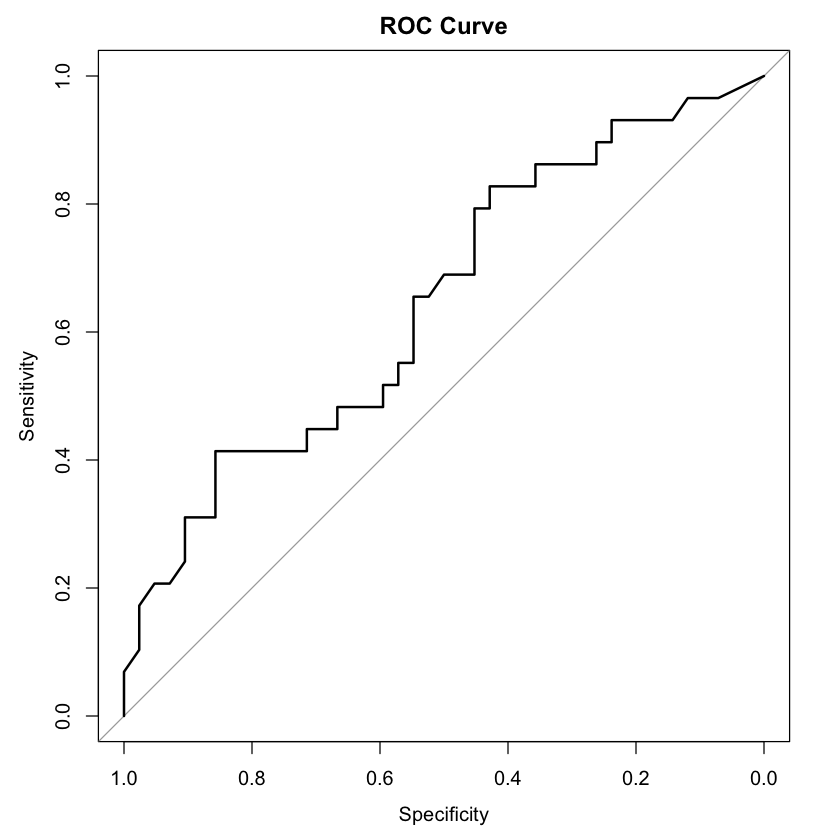

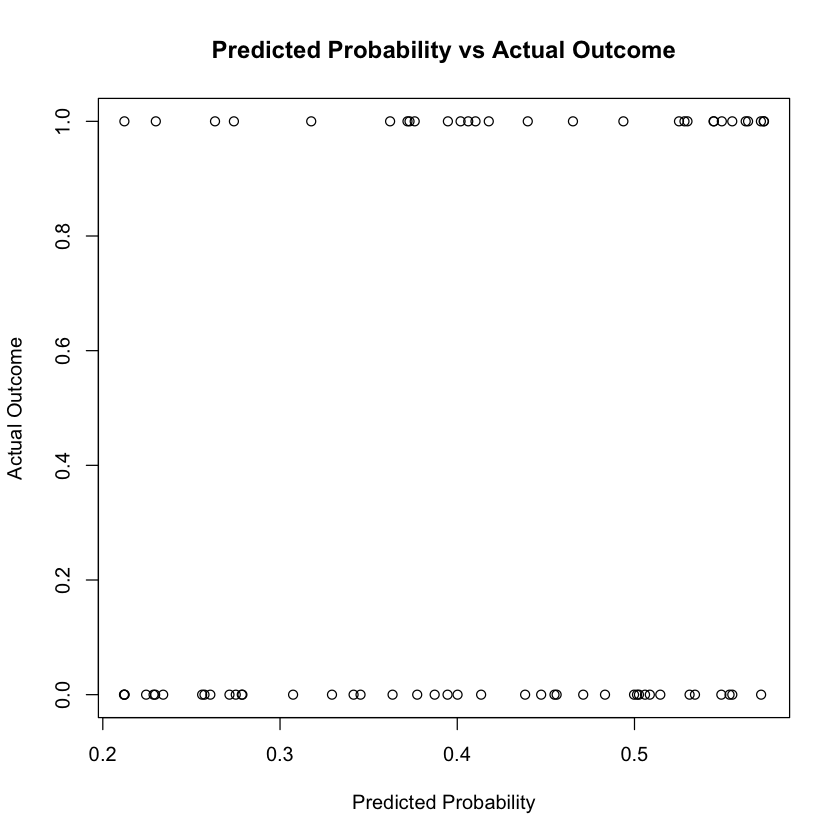

In [10]:
# Load necessary libraries
library(caret)
library(pROC)

# Fit the logistic regression model
fit_logistic <- glm(score_min ~ agg_mos, data = subjective, family = binomial)

# Get predictions
predictions <- predict(fit_logistic, subjective, type = "response")

# Plot the ROC curve
par(bg = "white")
roc_curve <- roc(subjective$serviceable_agg, predictions)
plot(roc_curve, main = "ROC Curve")

# Print confusion matrix
predicted_class <- ifelse(predictions > 0.5, 1, 0)
confusionMatrix(as.factor(predicted_class), as.factor(subjective$serviceable_agg))

# Plot with jitter to visualize overlapping points
par(bg = "white")
plot(jitter(predictions), subjective$serviceable_agg, 
     xlab = "Predicted Probability", ylab = "Actual Outcome", 
     main = "Predicted Probability vs Actual Outcome")